# tSNE
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time, math

from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore")

## 匯入資料

In [2]:
path_ = r'C:\Users\e2414\OneDrive\桌面\專題\AllData\training'  #資料從哪裡來
path_ = r'E:\專題\AllData\training\final_training' 

path_test = r'E:\專題\AllData\training\final_training\測試集再sampling'
path_ori = r'E:\專題\AllData\training\final_training\原始資料'
path_imb = r'E:\專題\AllData\training\final_training\十萬imbal'

path_bal = r'E:\專題\AllData\training\final_training\較bal'
path_pca = r'E:\專題\AllData\training\final_training\PCA'
path_tse = r'E:\專題\AllData\training\final_training\tomek_smote_enn'
path_tsne = r'E:\專題\AllData\training\final_training\tsne'

In [3]:
%%time
# try
with open(path_pca+ r"/X_train_total_pc20.pkl.", "rb") as f:
    X_train = pickle.load(f)
    
with open(path_ori+ r"/y_train.pkl", "rb") as f:
    y_train = pickle.load(f)
    
with open(path_pca+ r"/X_test_total_pc20.pkl.", "rb") as f:
    X_test = pickle.load(f)
    
with open(path_ori+ r"/y_test.pkl", "rb") as f:
    y_test = pickle.load(f)

Wall time: 3.65 s


In [4]:
print(X_train.shape)
print(len(y_train))

print(X_test.shape)
print(len(y_test))

(745961, 20)
745961
(82884, 20)
82884


## 要匯出的 tSNE 後 3 維資料
因為柯南太笨了發現 tSNE 結果其實不好...看要不要保留更高維度.... 改`n_components`

In [5]:
pp = 30 #(consider 5 ~ 50)

In [5]:
print(X_train.shape)
print(X_test.shape)

(745961, 20)
(82884, 20)


In [6]:
bind = np.vstack((X_train, X_test))  
bind.shape

(828845, 20)

In [7]:
label = list(range(1, 40+1))

In [8]:
ybind = y_train + y_test

In [10]:
#loc = [j for j,v in enumerate(ybind) if v == i+1]

In [ ]:
%%time
#6:08
for d in [3, 2]:
    
    for pp in [30, 40, 50, 60, 70]:
        
        X_embedded_2d = TSNE(n_components=d, perplexity=pp).fit_transform(bind)
        print(f'完成 d = {d}, pp= {pp}')
        
        with open(path_tsne+ f'/X_total_d{d}pp{pp}.pkl','wb') as f:
            pickle.dump(X_embedded_2d, f)

        
        if d ==2:
            fig= plt.figure(figsize= [24, 16])
            
            for i in range(40):      
                
                loc = [j for j,v in enumerate(ybind) if v == i+1]     
                plt.scatter(X_embedded_2d[loc, 0] , X_embedded_2d[loc, 1], s= 30, 
                 marker = 'o', label = i+1, edgecolors = col40[i], facecolors='none')

                plt.title(f'total 828845 data (pp={pp})', size = 26)
                plt.xlabel('tSNE Dimension 1', size = 22)
                plt.ylabel('tSNE Dimension 2', size = 22)
                plt.legend(loc = 'center left', fontsize=14, handletextpad=0.5, markerscale=2)

                plt.savefig(path_tsne+ f'/totalpp{pp}.jpg')



In [15]:
path_tsne = r'E:\專題\AllData\training\final_training\tSNE'

In [16]:
with open(path_tsne+ f'/X_40g10im_pp{pp}.pkl','wb') as f:
    pickle.dump(X_embedded_3d, f)

## <font color = red>做到以上就可以ㄌ</font>

<hr>

## 畫圖看 tSNE 2 維的表現


In [5]:
print(np.shape(train))
print(len(trainlabel))

(828845, 300)
828845


In [7]:
%%time
X_train, _, y_train, _ = train_test_split(train, trainlabel, test_size=0.5, random_state=1)

print(X_train.shape)
print(len(y_train))

(90862, 100)
90862
Wall time: 3.31 s


In [8]:
label = list(range(1, 20+1))
print("每組抽這麼多: ")
print([y_train.count(i) for i in label])

每組抽這麼多: 
[5632, 2535, 2446, 373, 17248, 181, 1195, 723, 1867, 1561, 3379, 2349, 2242, 5223, 4054, 7232, 7186, 6795, 8362, 10279]


In [7]:
pp= 30

In [8]:
%%time
X_embedded_2d = TSNE(n_components=2, perplexity=pp, verbose = True).fit_transform(train)
X_embedded_2d.shape

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 828845 samples in 0.336s...
[t-SNE] Computed neighbors for 828845 samples in 6518.281s...
[t-SNE] Computed conditional probabilities for sample 1000 / 828845
[t-SNE] Computed conditional probabilities for sample 2000 / 828845
[t-SNE] Computed conditional probabilities for sample 3000 / 828845
[t-SNE] Computed conditional probabilities for sample 4000 / 828845
[t-SNE] Computed conditional probabilities for sample 5000 / 828845
[t-SNE] Computed conditional probabilities for sample 6000 / 828845
[t-SNE] Computed conditional probabilities for sample 7000 / 828845
[t-SNE] Computed conditional probabilities for sample 8000 / 828845
[t-SNE] Computed conditional probabilities for sample 9000 / 828845
[t-SNE] Computed conditional probabilities for sample 10000 / 828845
[t-SNE] Computed conditional probabilities for sample 11000 / 828845
[t-SNE] Computed conditional probabilities for sample 12000 / 828845
[t-SNE] Computed conditional prob

[t-SNE] Computed conditional probabilities for sample 118000 / 828845
[t-SNE] Computed conditional probabilities for sample 119000 / 828845
[t-SNE] Computed conditional probabilities for sample 120000 / 828845
[t-SNE] Computed conditional probabilities for sample 121000 / 828845
[t-SNE] Computed conditional probabilities for sample 122000 / 828845
[t-SNE] Computed conditional probabilities for sample 123000 / 828845
[t-SNE] Computed conditional probabilities for sample 124000 / 828845
[t-SNE] Computed conditional probabilities for sample 125000 / 828845
[t-SNE] Computed conditional probabilities for sample 126000 / 828845
[t-SNE] Computed conditional probabilities for sample 127000 / 828845
[t-SNE] Computed conditional probabilities for sample 128000 / 828845
[t-SNE] Computed conditional probabilities for sample 129000 / 828845
[t-SNE] Computed conditional probabilities for sample 130000 / 828845
[t-SNE] Computed conditional probabilities for sample 131000 / 828845
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 239000 / 828845
[t-SNE] Computed conditional probabilities for sample 240000 / 828845
[t-SNE] Computed conditional probabilities for sample 241000 / 828845
[t-SNE] Computed conditional probabilities for sample 242000 / 828845
[t-SNE] Computed conditional probabilities for sample 243000 / 828845
[t-SNE] Computed conditional probabilities for sample 244000 / 828845
[t-SNE] Computed conditional probabilities for sample 245000 / 828845
[t-SNE] Computed conditional probabilities for sample 246000 / 828845
[t-SNE] Computed conditional probabilities for sample 247000 / 828845
[t-SNE] Computed conditional probabilities for sample 248000 / 828845
[t-SNE] Computed conditional probabilities for sample 249000 / 828845
[t-SNE] Computed conditional probabilities for sample 250000 / 828845
[t-SNE] Computed conditional probabilities for sample 251000 / 828845
[t-SNE] Computed conditional probabilities for sample 252000 / 828845
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 362000 / 828845
[t-SNE] Computed conditional probabilities for sample 363000 / 828845
[t-SNE] Computed conditional probabilities for sample 364000 / 828845
[t-SNE] Computed conditional probabilities for sample 365000 / 828845
[t-SNE] Computed conditional probabilities for sample 366000 / 828845
[t-SNE] Computed conditional probabilities for sample 367000 / 828845
[t-SNE] Computed conditional probabilities for sample 368000 / 828845
[t-SNE] Computed conditional probabilities for sample 369000 / 828845
[t-SNE] Computed conditional probabilities for sample 370000 / 828845
[t-SNE] Computed conditional probabilities for sample 371000 / 828845
[t-SNE] Computed conditional probabilities for sample 372000 / 828845
[t-SNE] Computed conditional probabilities for sample 373000 / 828845
[t-SNE] Computed conditional probabilities for sample 374000 / 828845
[t-SNE] Computed conditional probabilities for sample 375000 / 828845
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 484000 / 828845
[t-SNE] Computed conditional probabilities for sample 485000 / 828845
[t-SNE] Computed conditional probabilities for sample 486000 / 828845
[t-SNE] Computed conditional probabilities for sample 487000 / 828845
[t-SNE] Computed conditional probabilities for sample 488000 / 828845
[t-SNE] Computed conditional probabilities for sample 489000 / 828845
[t-SNE] Computed conditional probabilities for sample 490000 / 828845
[t-SNE] Computed conditional probabilities for sample 491000 / 828845
[t-SNE] Computed conditional probabilities for sample 492000 / 828845
[t-SNE] Computed conditional probabilities for sample 493000 / 828845
[t-SNE] Computed conditional probabilities for sample 494000 / 828845
[t-SNE] Computed conditional probabilities for sample 495000 / 828845
[t-SNE] Computed conditional probabilities for sample 496000 / 828845
[t-SNE] Computed conditional probabilities for sample 497000 / 828845
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 610000 / 828845
[t-SNE] Computed conditional probabilities for sample 611000 / 828845
[t-SNE] Computed conditional probabilities for sample 612000 / 828845
[t-SNE] Computed conditional probabilities for sample 613000 / 828845
[t-SNE] Computed conditional probabilities for sample 614000 / 828845
[t-SNE] Computed conditional probabilities for sample 615000 / 828845
[t-SNE] Computed conditional probabilities for sample 616000 / 828845
[t-SNE] Computed conditional probabilities for sample 617000 / 828845
[t-SNE] Computed conditional probabilities for sample 618000 / 828845
[t-SNE] Computed conditional probabilities for sample 619000 / 828845
[t-SNE] Computed conditional probabilities for sample 620000 / 828845
[t-SNE] Computed conditional probabilities for sample 621000 / 828845
[t-SNE] Computed conditional probabilities for sample 622000 / 828845
[t-SNE] Computed conditional probabilities for sample 623000 / 828845
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 729000 / 828845
[t-SNE] Computed conditional probabilities for sample 730000 / 828845
[t-SNE] Computed conditional probabilities for sample 731000 / 828845
[t-SNE] Computed conditional probabilities for sample 732000 / 828845
[t-SNE] Computed conditional probabilities for sample 733000 / 828845
[t-SNE] Computed conditional probabilities for sample 734000 / 828845
[t-SNE] Computed conditional probabilities for sample 735000 / 828845
[t-SNE] Computed conditional probabilities for sample 736000 / 828845
[t-SNE] Computed conditional probabilities for sample 737000 / 828845
[t-SNE] Computed conditional probabilities for sample 738000 / 828845
[t-SNE] Computed conditional probabilities for sample 739000 / 828845
[t-SNE] Computed conditional probabilities for sample 740000 / 828845
[t-SNE] Computed conditional probabilities for sample 741000 / 828845
[t-SNE] Computed conditional probabilities for sample 742000 / 828845
[t-SNE] Computed con

(828845, 2)

In [9]:
with open(path_+ f'/alltSNE_pp{pp}.pkl','wb') as f:
    pickle.dump(X_embedded_2d, f)

In [14]:
X_embedded_2d

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [166]:
## 匯出到 r 看看
#data = pd.DataFrame(X_embedded_2d)
#data.to_excel(path_+ "/pytSNEpp2.xlsx")
X_train y_train

In [24]:
col40 = ["#FFDEDE", "#FF8C8C", "#FF3B3B", "#B20000", "#800000",   
          "#FFE8BF", "#FFD382", "#FFB630", "#E09200", "#AD7100", "#805300", 
          "#FFFF26", "#DBDB00", "#A8A800", "#808000",
          "#ABFFAB", "#00FF00", "#00D100", "#008000", 
          "#BFFFFF", "#1CFFFF", "#00DBDB", "#00ADAD", "#008080", 
          "#D6D6FF", "#9999FF", "#3030FF", "#0000BD",
          "#E0B5FF", "#BD63FF", "#990DFF", '#4A0080',
          "#FFB5FF", "#FF6EFF", "#D600D6", "#800080",
          "#EDEDED", "#BFBFBF", "#8C8C8C", "#3B3B3B"]

In [14]:
col20 = [col40[i] for i in list(range(1, 40+ 1, 2))]

In [1]:
%%time
fig= plt.figure(figsize= [24, 16])

for i in range(40):
    
    plt.scatter(X_embedded_2d[i*400 : (i+1)*400, 0] , X_embedded_2d[i*400 : (i+1)*400, 1], s= 40, 
                 marker = 'o', label = i+1, c = col40[i])
    
plt.title(f'sampling from 40 emoji groups (pp={pp})', size = 24)
plt.xlabel('tSNE Dimension 1', size = 20)
plt.ylabel('tSNE Dimension 2', size = 20)
plt.legend(loc = 'center left', fontsize=14, handletextpad=0.5, markerscale=2)

plt.savefig(path_+ f'/pytSNEpp{pp}.jpg')

Wall time: 94.7 ms


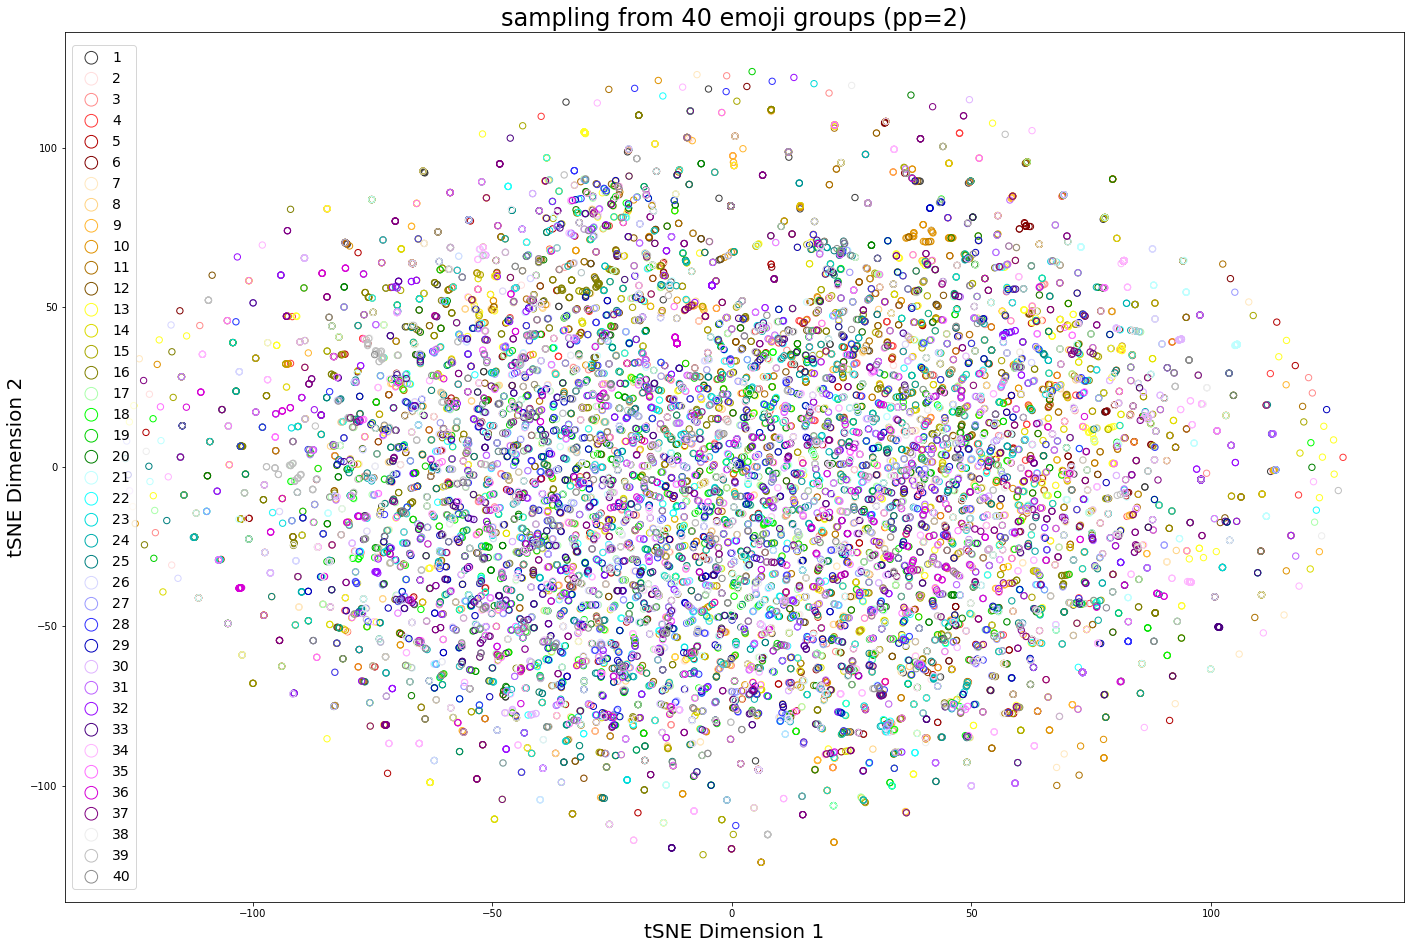

In [132]:
%%time
fig= plt.figure(figsize= [24, 16])

for i in range(40):
    plt.scatter(X_embedded_2d[i*400 : (i+1)*400, 0] , X_embedded_2d[i*400 : (i+1)*400, 1], s= 40, 
                 marker = 'o', label = i+1, edgecolors = col40[i-1], facecolors='none')
    
plt.title('sampling from 40 emoji groups (pp=2)', size = 24)
plt.xlabel('tSNE Dimension 1', size = 20)
plt.ylabel('tSNE Dimension 2', size = 20)
plt.legend(loc = 'center left', fontsize=14, handletextpad=0.5, markerscale=2)

#plt.savefig(path_+ '/emo400_pp2.jpg')

## 試從 R 抓下來的 tSNE 資料

In [134]:
path_ = r'C:\Users\e2414\OneDrive\桌面\專題\AllData\training\emoji_sampling\emo_400'  
trainR = pd.read_csv(path_ + r'\R400_pp2.csv')
trainR = trainR.drop("Unnamed: 0", axis = 1)
np.shape(trainR)

(16000, 2)

In [137]:
trainR = np.array(trainR)

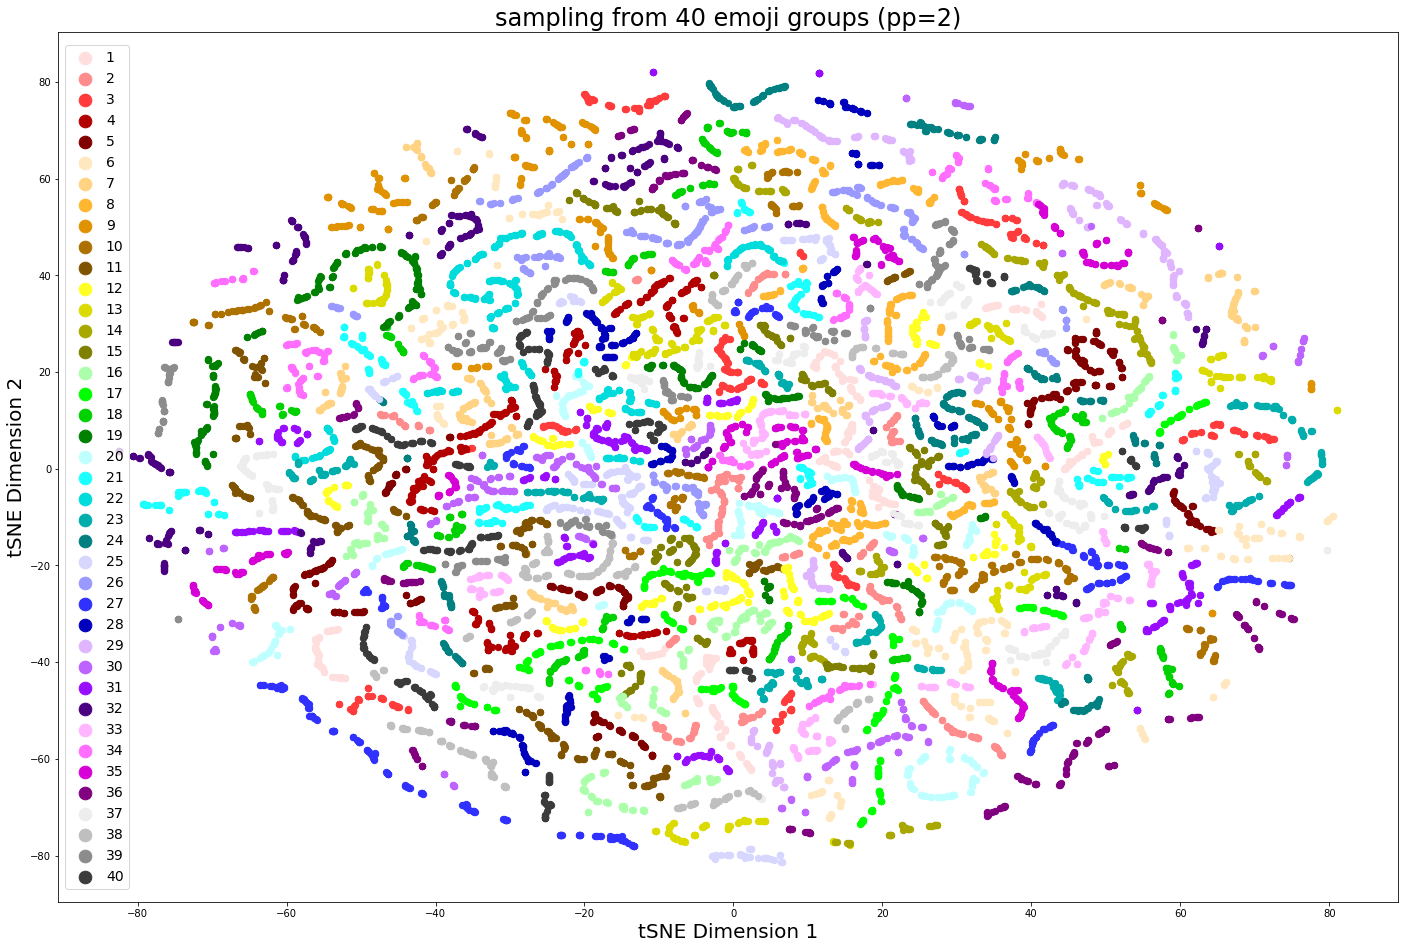

In [138]:
fig= plt.figure(figsize= [24, 16])


for i in range(40):
    plt.scatter(trainR[i*400 : (i+1)*400, 0] , trainR[i*400 : (i+1)*400, 1], s= 40, 
                 marker = 'o', label = i+1, c = col40[i])
    
plt.title('sampling from 40 emoji groups (pp=2)', size = 24)
plt.xlabel('tSNE Dimension 1', size = 20)
plt.ylabel('tSNE Dimension 2', size = 20)
plt.legend(loc = 'center left', fontsize=14, handletextpad=0.5, markerscale=2)